## daily data updates for the helioforecast.space website 

NOAA L1 and STEREO-A

Main author: C. Möstl, Austrian Space Weather Office, GeoSphere Austria

https://github.com/cmoestl/heliocats

data_update_web.py

uses environment 'envs/env_helio4.yml'

for updating data every day on the servers

Issues:




In [1]:
#switches
debug_mode=0

#switches
get_noaa=1
get_stereoa=1


import pickle
import importlib
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import sys
import numpy as np
import datetime
import scipy.signal
import urllib
import json
import os   
import time
import h5py
import pytz
import copy
import cdflib

from heliocats import data as hd
from heliocats import plot as hp


##### check for system type
#server
if sys.platform == 'linux': 
    print('system is linux')
    matplotlib.use('Agg') 
#mac
if sys.platform =='darwin':  
    print('system is mac')
    %matplotlib inline     



################################################ CHECK  ##############################################
os.system('jupyter nbconvert --to script data_update_web.ipynb')   


####################################################################################################################


#test execution times
t0all = time.time()


/Users/chris/python/miniconda3/envs/helio4/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


system is mac


[NbConvertApp] Converting notebook data_update_web.ipynb to script
[NbConvertApp] Writing 8708 bytes to data_update_web.py


### Configure paths depending on server or local machine


In [2]:
if sys.platform == 'linux': 
    
    from config_server import data_path
    from config_server import noaa_path
    from config_server import wind_path
    from config_server import stereoa_path
    from config_server import data_path_ml
    
if sys.platform =='darwin':  

    from config_local import data_path
    from config_local import noaa_path
    from config_local import wind_path
    from config_local import stereoa_path
    from config_local import data_path_ml

print(' ')
print('------ PATHS ')

print(data_path)
print(noaa_path)
print(wind_path)
print(stereoa_path)
print(data_path_ml)


plot_path=data_path+'plots/'
position_path=data_path+'plots_positions/'
sun_path=data_path+'plots_sun/'

print(plot_path)
print(position_path)



########### make directories first time
if os.path.isdir(plot_path) == False: os.mkdir(plot_path)
if os.path.isdir(plot_path+'omni2') == False: os.mkdir(plot_path+'omni2')
if os.path.isdir(plot_path+'wind') == False: os.mkdir(plot_path+'wind')
if os.path.isdir(plot_path+'stereoa') == False: os.mkdir(plot_path+'stereoa')
if os.path.isdir(plot_path+'combined') == False: os.mkdir(plot_path+'combined')


if os.path.isdir(position_path) == False: os.mkdir(position_path)
if os.path.isdir(sun_path) == False: os.mkdir(sun_path)
if os.path.isdir(noaa_path) == False: os.mkdir(noaa_path)
if os.path.isdir(data_path_ml) == False: os.mkdir(data_path_ml)

 
------ PATHS 
/Users/chris/python/data/insitu_python/
/Users/chris/python/ops/data/noaa/
/Users/chris/python/data/wind/
/Users/chris/python/data/stereoa/
/Users/chris/python/data/insitu_python/ML_struct_arrays/
/Users/chris/python/data/insitu_python/plots/
/Users/chris/python/data/insitu_python/plots_positions/


### positions and SDO plot

 
------ POSITIONS 
-1.0538966529227753
saved as  /Users/chris/python/data/insitu_python/plots_positions/positions_2025_Sep_30.png
saved as  /Users/chris/python/data/insitu_python/plots_positions/positions_now.p


/Users/chris/python/heliocats/heliocats/plot.py:3682: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chris/python/heliocats/heliocats/plot.py:3683: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chris/python/heliocats/heliocats/plot.py:3684: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

saved as  /Users/chris/python/data/insitu_python/plots_positions/positions_now.txt
saved as  /Users/chris/python/data/insitu_python/plots_positions/positions_now.png


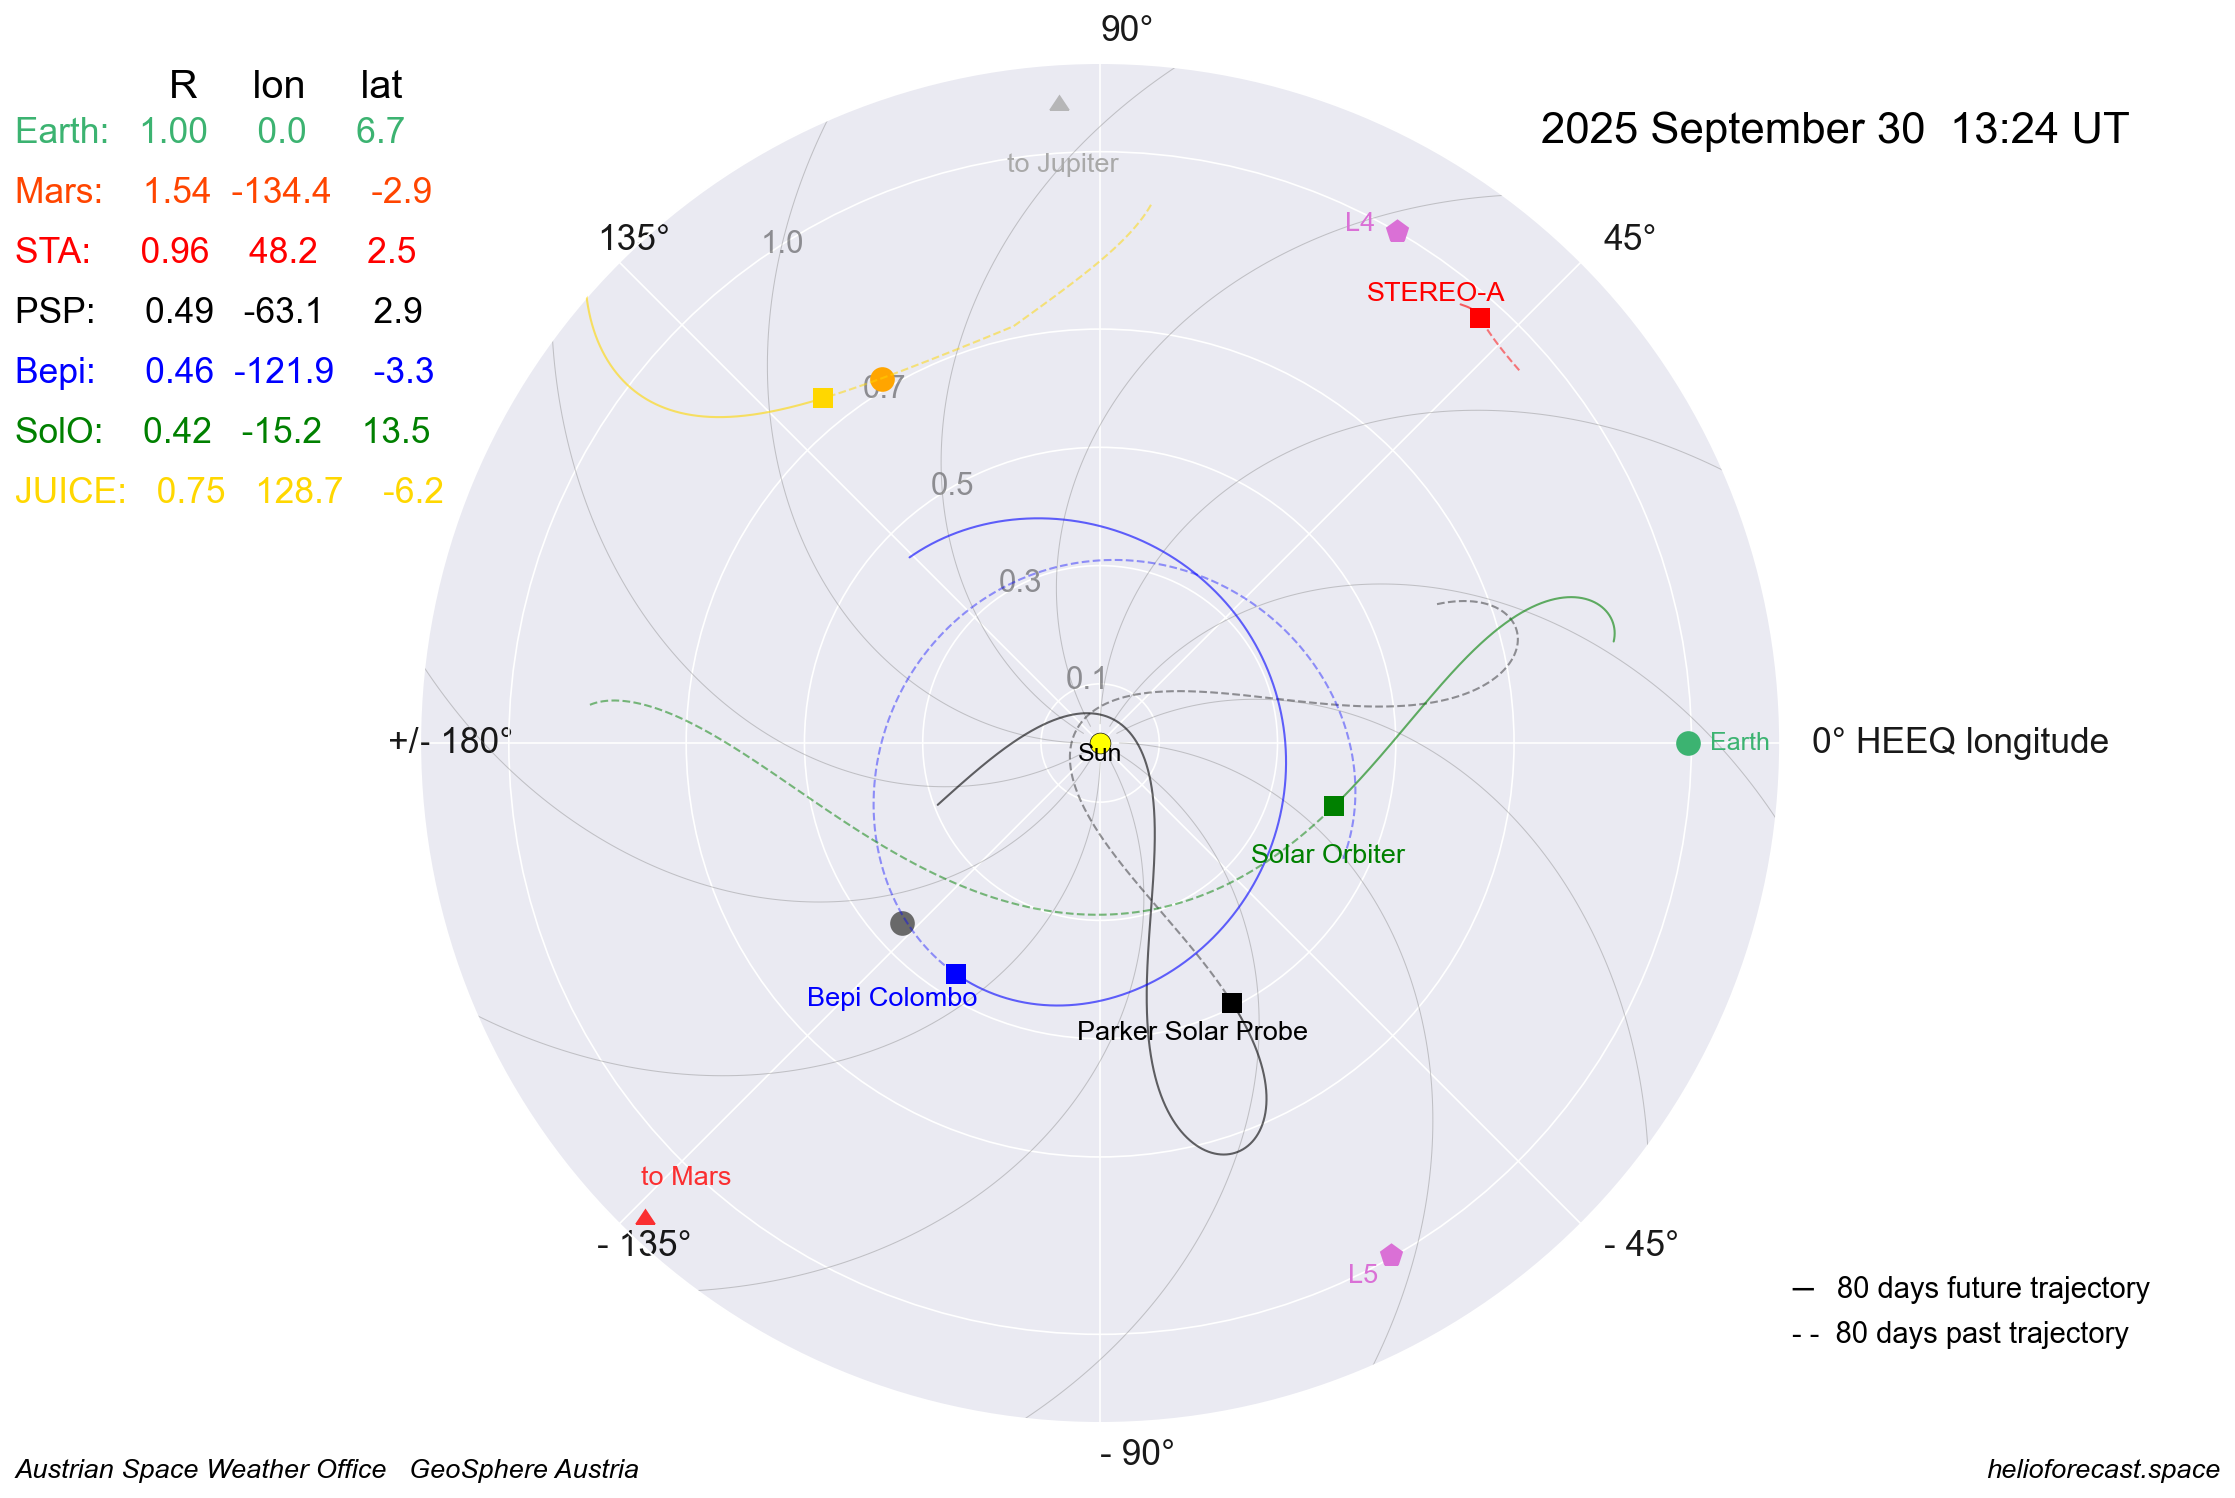

/Users/chris/python/ops/data/noaa/xray/xray-7-day_2025-09-30.json
 
------ SDO realtime images 
saved  /Users/chris/python/data/insitu_python/plots_sun/latest_1024_0193.jpg
2025-09-13 12:07 UT
saved  /Users/chris/python/data/insitu_python/plots_sun/latest_1024_HMIB.jpg
2025-09-13 11:45 UT
saved  /Users/chris/python/data/insitu_python/plots_sun/latest_1024_HMIIC.jpg
saved  /Users/chris/python/data/insitu_python/plots_sun/latest_1024_HMIBpfss.jpg

Positions and SDO images takes 10.95 seconds


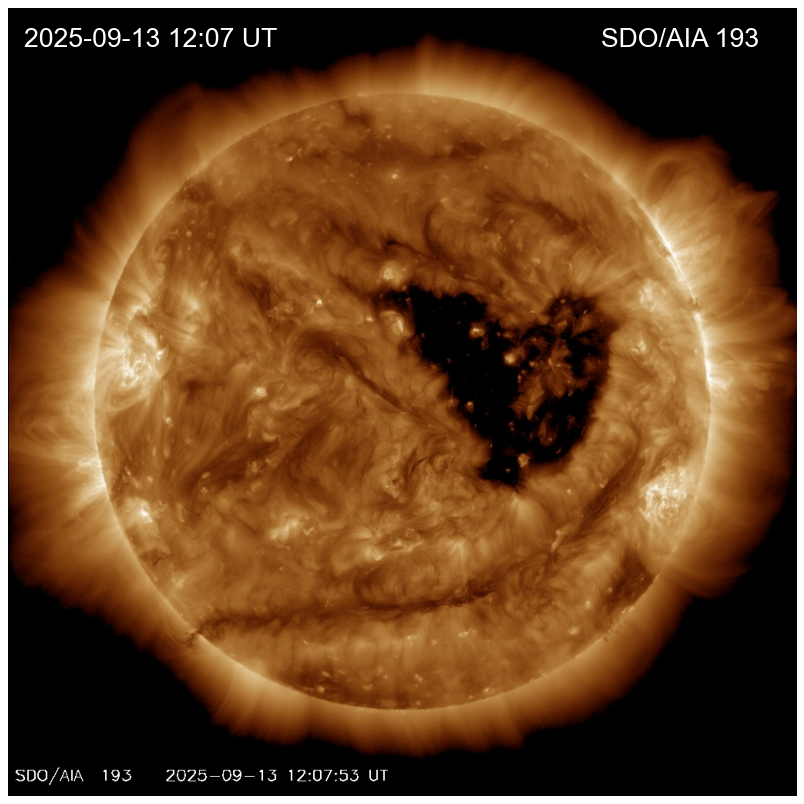

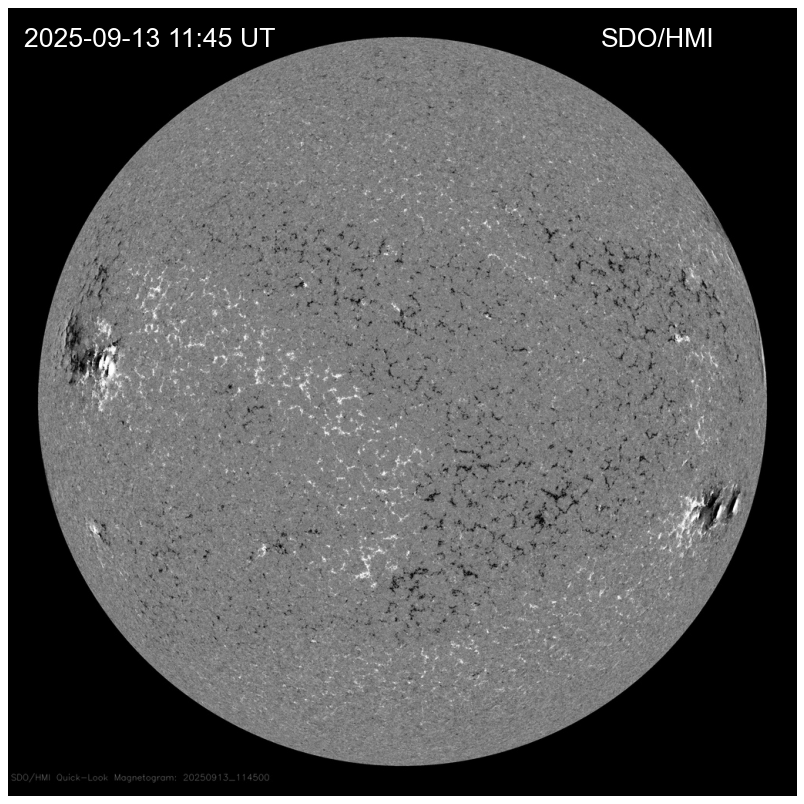

In [3]:
#if debug_mode > 0: 
importlib.reload(hd) 
importlib.reload(hp) 


t0 = time.time()
print(' ')
print('------ POSITIONS ')

# spacecraft positions image
hp.plot_positions(datetime.datetime.utcnow(),position_path, 'HEEQ',now=True)


#get NOAA xray file and plot on SDO map
xray='https://services.swpc.noaa.gov/json/goes/primary/xrays-7-day.json'

datestr=str(datetime.datetime.utcnow().strftime("%Y-%m-%d"))
try: 
    urllib.request.urlretrieve(xray, noaa_path+'xray/xrays-7-day_'+datestr+'.json')
    print(noaa_path+'xray/xray-7-day_'+datestr+'.json')
except urllib.error.URLError as e:
    print(' ', xray,' ',e.reason)



print(' ')
print('------ SDO realtime images ')
# get current SDO images 
hd.get_sdo_realtime_image(sun_path)

t1 = time.time()
print()
print('Positions and SDO images takes', np.round(t1-t0,2), 'seconds')

### NOAA real time solar wind and Dst

In [6]:
if debug_mode > 0: 
    importlib.reload(hd) 
    importlib.reload(hp) 

print(' ')
print('------ NOAA real time solar wind data ')

#test execution times
t0 = time.time()

filenoaa='noaa_rtsw_last_2_years_now.p'
filedst='noaa_dst_last_2_years_now.p'


if get_noaa > 0:
    print('download NOAA real time solar wind plasma and mag and dst')
    datestr=str(datetime.datetime.utcnow().strftime("%Y-%m-%d"))
    print(datestr+' UTC')

    
    #solar wind
    ephem='http://services.swpc.noaa.gov/products/solar-wind/ephemerides.json' 
    plasma='http://services.swpc.noaa.gov/products/solar-wind/plasma-7-day.json'
    mag='http://services.swpc.noaa.gov/products/solar-wind/mag-7-day.json'
    
    dst='https://services.swpc.noaa.gov/products/kyoto-dst.json'
    
    
    try: 
        urllib.request.urlretrieve(ephem, noaa_path+'ephem/ephemerides_'+datestr+'.json')
        print(noaa_path+'ephem/ephemerides_'+datestr+'.json')
    except urllib.error.URLError as e:
        print(' ', ephem,' ',e.reason)


    try: 
        urllib.request.urlretrieve(plasma, noaa_path+'plasma/plasma-7-day_'+datestr+'.json')
        print(noaa_path+'plasma/plasma-7-day_'+datestr+'.json')
    except urllib.error.URLError as e:
        print(' ', plasma,' ',e.reason)

    try: 
        urllib.request.urlretrieve(mag, noaa_path+'mag/mag-7-day_'+datestr+'.json')
        print(noaa_path+'mag/mag-7-day_'+datestr+'.json')
    except urllib.error.URLError as e:
        print(' ', mag,' ',e.reason)
        

    try: 
        urllib.request.urlretrieve(dst, noaa_path+'dst/dst-7-day_'+datestr+'.json')
        print(noaa_path+'dst/dst-7-day_'+datestr+'.json')
    except urllib.error.URLError as e:
        print(' ', mag,' ',e.reason)
 
    print('NOAA RTSW download complete')
    
    
           
    ## SAVE NOAA DATA AS PICKLE, dst as extra file
    # last parameter gives a cutoff, so only the latest N files are taken for the NOAA data pickle file
    
    #make a file for the last 2 years, ephemerides on server available from 2023 August 7
    hd.save_noaa_rtsw_data(data_path,noaa_path,filenoaa,filedst,2*365)
    
    
    print('NOAA RTSW saved as pickle file complete')


else:
    print('NOAA data NOT downloaded and saved as pickle, turn on switch')  
 
    
[noaa,hnoaa]=pickle.load(open(data_path+filenoaa, "rb" ) ) 

#load dst file
#dst=pickle.load(open(data_path+filedst, "rb" ) ) 

 

#plot
start=datetime.datetime.utcnow() - datetime.timedelta(days=55)
end=datetime.datetime.utcnow() 
hp.plot_insitu_update_noaa_rtsw(noaa, start, end,'NOAA_RTSW',plot_path+'noaa/',now2=True)


t1 = time.time()

print()
print('NOAA download latest file, save as pickle 2 years files and plotting takes', np.round(t1-t0,2), 'seconds')

    

 
------ NOAA real time solar wind data 
download NOAA real time solar wind plasma and mag and dst
2025-09-30 UTC
/Users/chris/python/ops/data/noaa/ephem/ephemerides_2025-09-30.json
/Users/chris/python/ops/data/noaa/plasma/plasma-7-day_2025-09-30.json
/Users/chris/python/ops/data/noaa/mag/mag-7-day_2025-09-30.json
/Users/chris/python/ops/data/noaa/dst/dst-7-day_2025-09-30.json
NOAA RTSW download complete
 
convert NOAA real time solar wind archive to pickle file
directories for the json data
/Users/chris/python/ops/data/noaa/mag/
Sorted file list to be read with cutoff  300  files. 
['mag-7-day_2023-06-06T23h.json' 'mag-7-day_2023-06-07T05h.json'
 'mag-7-day_2023-06-07T11h.json' 'mag-7-day_2023-06-07T17h.json'
 'mag-7-day_2023-06-07T23h.json' 'mag-7-day_2023-06-08T05h.json'
 'mag-7-day_2023-06-08T11h.json' 'mag-7-day_2023-06-08T17h.json'
 'mag-7-day_2023-06-08T23h.json' 'mag-7-day_2023-06-09T05h.json'
 'mag-7-day_2023-06-09T11h.json' 'mag-7-day_2023-06-09T17h.json'
 'mag-7-day_2023-06-

KeyboardInterrupt: 

### STEREO-A beacon data

 
------ STEREO-A beacon data 
 
--- download STEREO-A beacon data last 30 days 
download STEREO-A beacon data to  /Users/chris/python/data/stereoa/
STA_LB_IMPACT_20250826_V02.cdf
STA_LB_PLASTIC_20250826_V14.cdf
STA_LB_IMPACT_20250827_V02.cdf
STA_LB_PLASTIC_20250827_V14.cdf
STA_LB_IMPACT_20250828_V02.cdf
STA_LB_PLASTIC_20250828_V14.cdf
STA_LB_IMPACT_20250829_V02.cdf
STA_LB_PLASTIC_20250829_V14.cdf
STA_LB_IMPACT_20250830_V02.cdf
STA_LB_PLASTIC_20250830_V14.cdf
STA_LB_IMPACT_20250831_V02.cdf
STA_LB_PLASTIC_20250831_V14.cdf
STA_LB_IMPACT_20250901_V02.cdf
STA_LB_PLASTIC_20250901_V14.cdf
STA_LB_IMPACT_20250902_V02.cdf
STA_LB_PLASTIC_20250902_V14.cdf
STA_LB_IMPACT_20250903_V02.cdf
STA_LB_PLASTIC_20250903_V14.cdf
STA_LB_IMPACT_20250904_V02.cdf
STA_LB_PLASTIC_20250904_V14.cdf
STA_LB_IMPACT_20250905_V02.cdf
STA_LB_PLASTIC_20250905_V14.cdf
STA_LB_IMPACT_20250906_V02.cdf
STA_LB_PLASTIC_20250906_V14.cdf
STA_LB_IMPACT_20250907_V02.cdf
STA_LB_PLASTIC_20250907_V14.cdf
STA_LB_IMPACT_20250908_V02.cdf
S

/Users/chris/python/miniconda3/envs/helio4/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning:

ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"



position start with astrospice stereo-A predict


Files Downloaded: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.24file/s]


position end 
conversion RTN to GSE
conversion RTN to GSE done
conversion GSE to GSM
conversion GSE to GSM done
save pickle file
save pickle file
done sta
saved as  /Users/chris/python/data/insitu_python/plots/stereoa/STEREO-A_beacon_rtn_2025_Aug_01_2025_Sep_25.png
saved as  /Users/chris/python/data/insitu_python/plots/stereoa/STEREO-A_beacon_rtn_now2.png
saved as  /Users/chris/python/data/insitu_python/plots/stereoa/STEREO-A_beacon_rtn_now2.pdf
saved as  /Users/chris/python/data/insitu_python/plots/stereoa/STEREO-A_beacon_gsm_2025_Aug_01_2025_Sep_25.png
saved as  /Users/chris/python/data/insitu_python/plots/stereoa/STEREO-A_beacon_gsm_now2.png
saved as  /Users/chris/python/data/insitu_python/plots/stereoa/STEREO-A_beacon_gsm_now2.pdf

STEREO-A beacon downloading last 30 days, save as pickle last 400 days and plotting takes 346.17 seconds


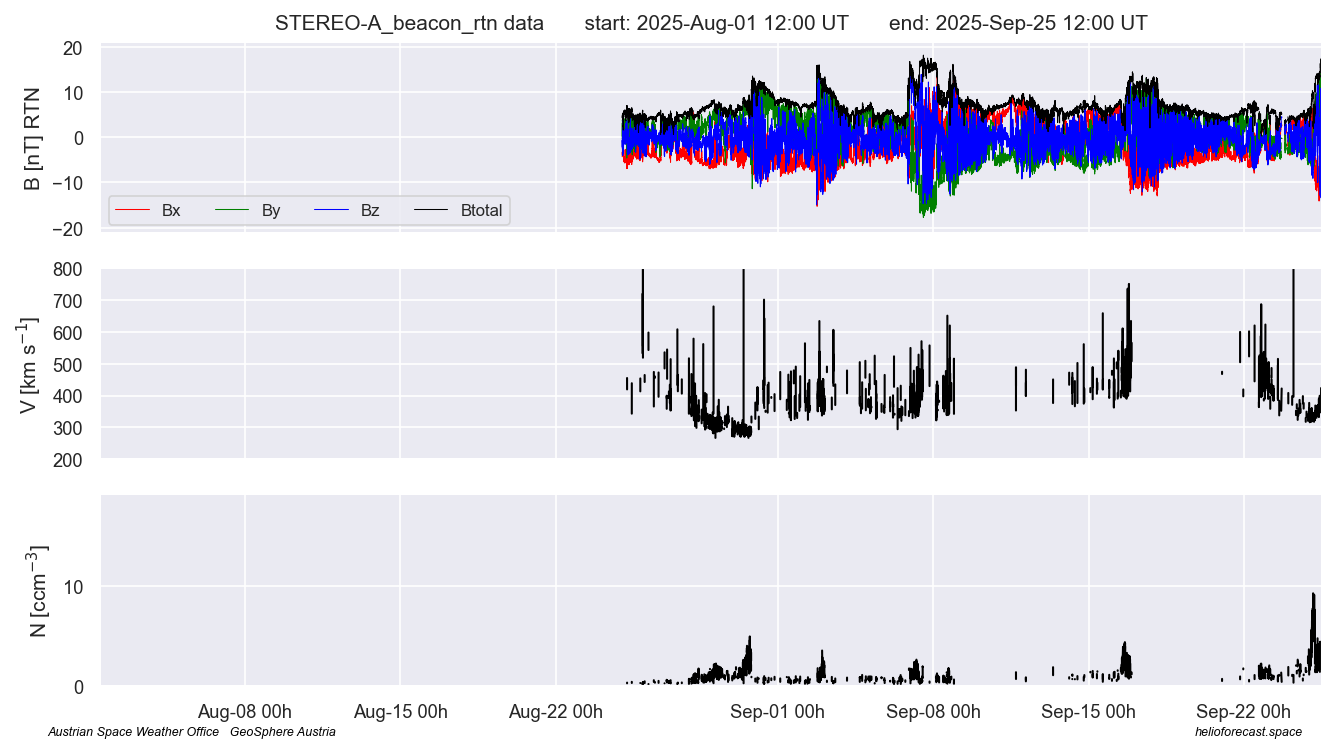

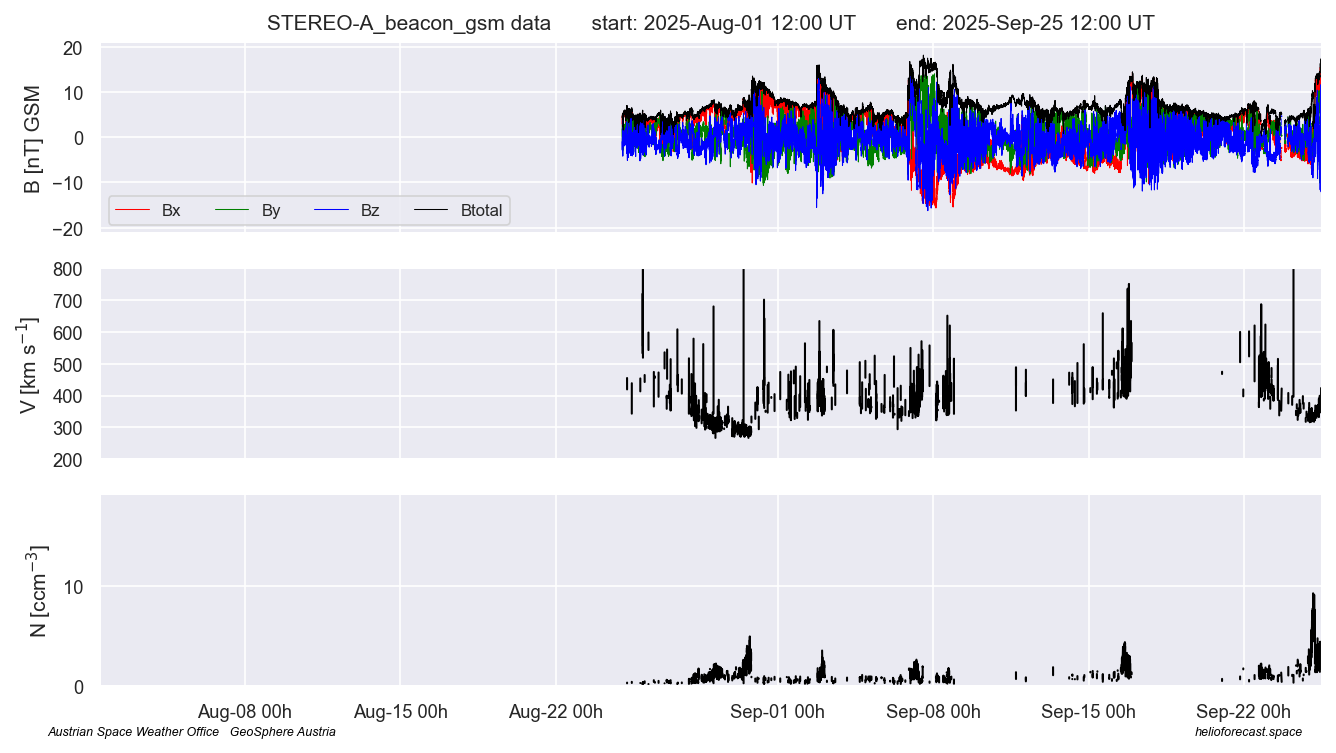

In [5]:
if debug_mode > 0: 
    importlib.reload(hd) 
    importlib.reload(hp) 

#test execution times
t0 = time.time()


print(' ')
print('------ STEREO-A beacon data ')

#define filename
file_sta_beacon_rtn='stereoa_beacon_rtn_last_600days_now.p'   
file_sta_beacon_gsm='stereoa_beacon_gsm_last_600days_now.p'   


if get_stereoa > 0:

    print(' ')
    print('--- download STEREO-A beacon data last 30 days ')
    hd.stereoa_download_beacon(start=datetime.datetime.utcnow()-datetime.timedelta(days=30),end=datetime.datetime.utcnow(),stereoa_path=stereoa_path)   
    print(' ')

    print('--- process STEREO-A beacon data to pickle last 600 days') 
    #save pickle file
    hd.save_stereoa_beacon_data(data_path,stereoa_path,file_sta_beacon_rtn,file_sta_beacon_gsm,datetime.datetime.utcnow()-datetime.timedelta(days=600),datetime.datetime.utcnow(),coord='RTN' )   
    
#plot
  
#load rtn
[sta_rtn,hsta]=pickle.load(open(data_path+file_sta_beacon_rtn, "rb" ) )  
start=datetime.datetime.utcnow() - datetime.timedelta(days=55)
end=datetime.datetime.utcnow() 
hp.plot_insitu_update_stereoa_beacon(sta_rtn, start, end,'STEREO-A_beacon_rtn',plot_path+'stereoa/',coord='RTN',now2=True)


#load gsm
[sta_gsm,hsta]=pickle.load(open(data_path+file_sta_beacon_gsm, "rb" ) )  
start=datetime.datetime.utcnow() - datetime.timedelta(days=55)
end=datetime.datetime.utcnow() 
hp.plot_insitu_update_stereoa_beacon(sta_gsm, start, end,'STEREO-A_beacon_gsm',plot_path+'stereoa/',coord='GSM',now2=True)


    
t1 = time.time()

print()
print('STEREO-A beacon downloading last 30 days, save as pickle last 400 days and plotting takes', np.round(t1-t0,2), 'seconds')

In [6]:

t1all = time.time()

print(' ')
print(' ')
print(' ')
print('------------------')
print('Runtime for full data update web code:', np.round((t1all-t0all)/60,2), 'minutes')
print('--------------------------------------------------------------------------------------')



 
 
 
------------------
Runtime for full data update web code: 8.64 minutes
--------------------------------------------------------------------------------------


In [7]:
#also make the last 2500 files, 3900 available in total
filenoaa2='noaa_rtsw_last_2500files_now.p'
filedst2='noaa_dst_last_2500_now.p'    
hd.save_noaa_rtsw_data(data_path,noaa_path,filenoaa2,filedst2,2500)


 
convert NOAA real time solar wind archive to pickle file
directories for the json data
/Users/chris/python/ops/data/noaa/mag/
Sorted file list to be read with cutoff  2500  files. 
['mag-7-day_2023-06-06T23h.json' 'mag-7-day_2023-06-07T05h.json'
 'mag-7-day_2023-06-07T11h.json' 'mag-7-day_2023-06-07T17h.json'
 'mag-7-day_2023-06-07T23h.json' 'mag-7-day_2023-06-08T05h.json'
 'mag-7-day_2023-06-08T11h.json' 'mag-7-day_2023-06-08T17h.json'
 'mag-7-day_2023-06-08T23h.json' 'mag-7-day_2023-06-09T05h.json'
 'mag-7-day_2023-06-09T11h.json' 'mag-7-day_2023-06-09T17h.json'
 'mag-7-day_2023-06-09T23h.json' 'mag-7-day_2023-06-10T05h.json'
 'mag-7-day_2023-06-10T11h.json' 'mag-7-day_2023-06-10T17h.json'
 'mag-7-day_2023-06-10T23h.json' 'mag-7-day_2023-06-11T05h.json'
 'mag-7-day_2023-06-11T11h.json' 'mag-7-day_2023-06-11T17h.json'
 'mag-7-day_2023-06-11T23h.json' 'mag-7-day_2023-06-12T05h.json'
 'mag-7-day_2023-06-12T11h.json' 'mag-7-day_2023-06-12T17h.json'
 'mag-7-day_2023-06-12T23h.json' 'mag